<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Final-Project-2020-21/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MOUNT GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount("/content/drive")

print("\nDRIVE IS MOUNTED!!!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DRIVE IS MOUNTED!!!


### IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

print("LIBARARIES IMPORTED!!!")

LIBARARIES IMPORTED!!!


### IMPORT DATA

In [3]:
path = "/content/drive/MyDrive/Final Project/Covid19Summary.csv"

data = pd.read_csv(path)
print("Dimensions of Data: ", data.shape)

Dimensions of Data:  (239, 2)


In [4]:
data.head()

,Date,Cases
0,07-03-2020,18
1,08-03-2020,17
2,09-03-2020,18
3,10-03-2020,26
4,11-03-2020,32


## EXPLORATORY DATA ANALYSIS

### Checking Empty Values

In [5]:
if data.isna().sum().sum() ==0:
  print("NO EMPTY VALUES!!!")

NO EMPTY VALUES!!!


In [6]:
data.Date = [i+" 11:00" for i in data.Date]
data.head()

,Date,Cases
0,07-03-2020 11:00,18
1,08-03-2020 11:00,17
2,09-03-2020 11:00,18
3,10-03-2020 11:00,26
4,11-03-2020 11:00,32


## TIME SERIES FORECASTING

### Formating Data for Time Series Forecasting

In [7]:
data.Date = pd.to_datetime(data.Date, format='%d-%m-%Y %H:%M')
data.index = data.Date
data = data.resample('D').mean()

### Splitting the Data

In [8]:
train = data[:int(data.shape[0]*0.85)]
test = data[int(data.shape[0]*0.85):]

print("Training Data: ", train.shape, "Testing Data: ", test.shape)

Training Data:  (203, 1) Testing Data:  (36, 1)


### Time Series Plot

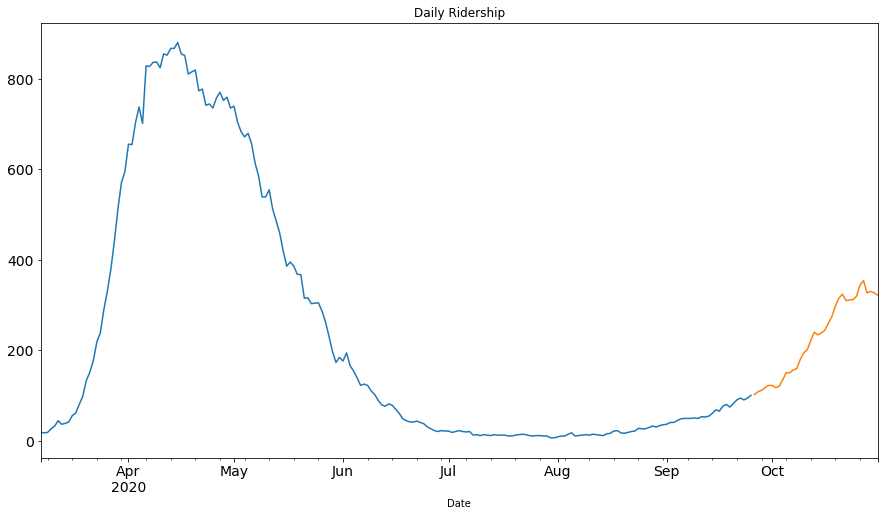

In [39]:
train.Cases.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Cases.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

## MODEL 1: Naive Approach

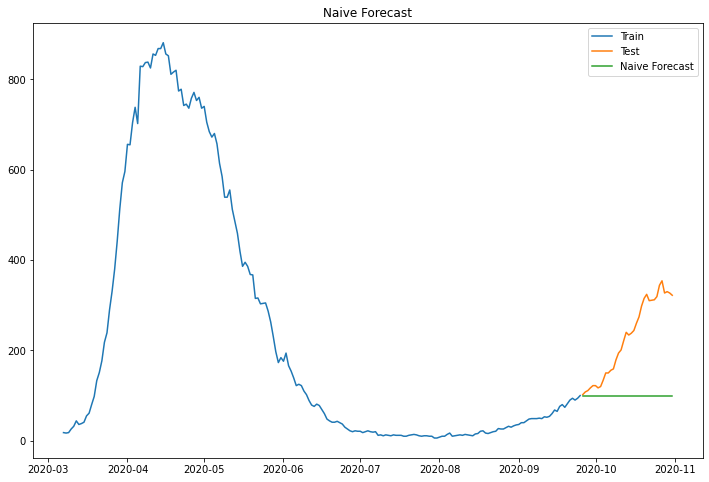

In [40]:
dd = np.asarray(train.Cases)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Cases'], label='Train')
plt.plot(test.index,test['Cases'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_na = sqrt(mean_squared_error(test.Cases, y_hat.naive))
print("RMS Value: ", rms_na)

RMS Value:  152.24833514871534


## MODEL 2: Simple Average

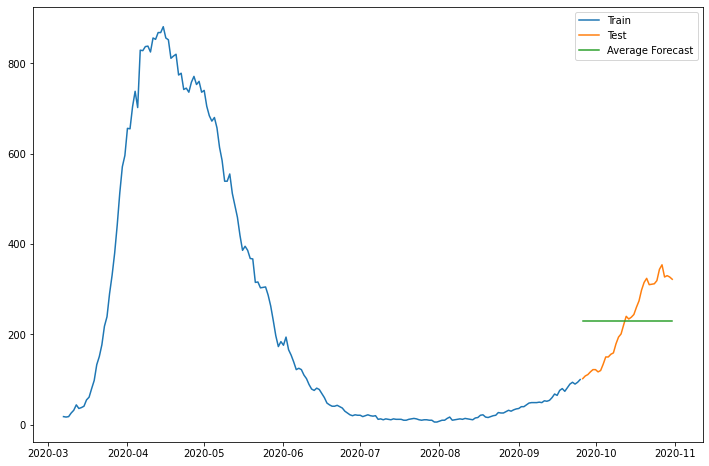

In [42]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Cases'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Cases'], label='Train')
plt.plot(test['Cases'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [43]:
rms_sa = sqrt(mean_squared_error(test.Cases, y_hat_avg.avg_forecast))
print("RMS Value: ", rms_sa)

RMS Value:  85.16142236343195


## MODEL 3: Moving Average

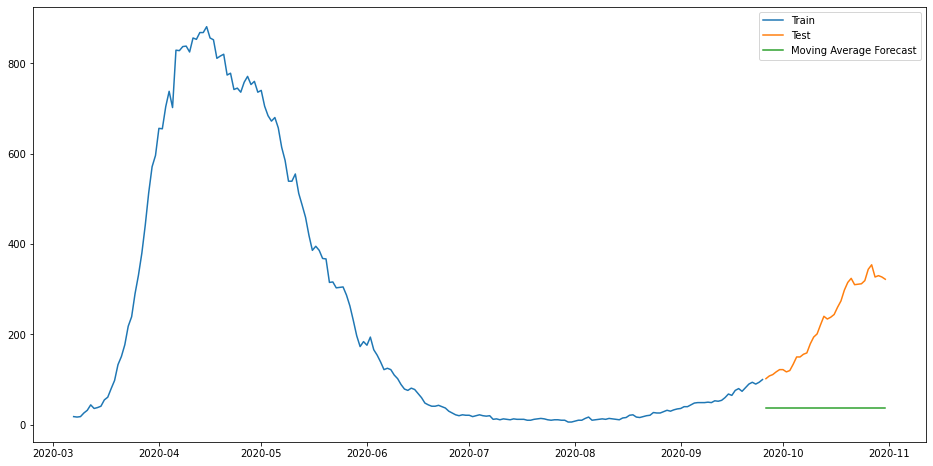

In [44]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Cases'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Cases'], label='Train')
plt.plot(test['Cases'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [45]:
rms_ma = sqrt(mean_squared_error(test.Cases, y_hat_avg['moving_avg_forecast']))
print("RMS Value: ", rms_ma)

RMS Value:  207.97934882347582


## MODEL 4: Simple Exponential Smoothing

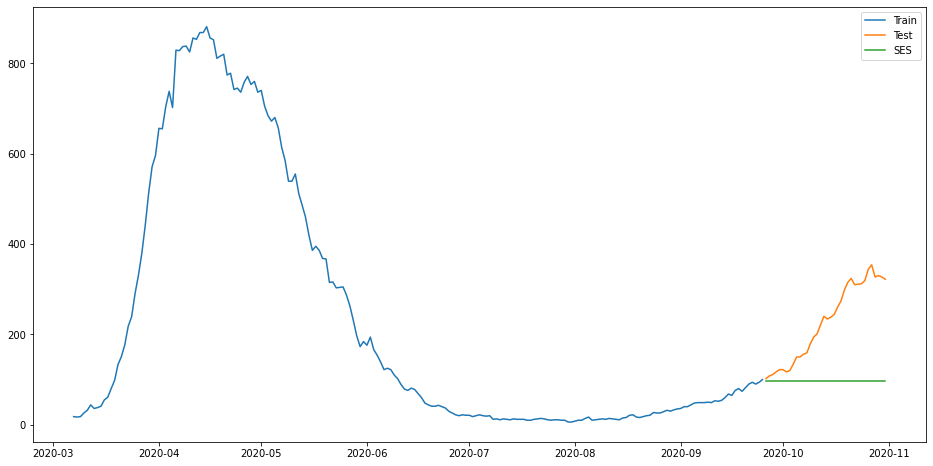

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Cases'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Cases'], label='Train')
plt.plot(test['Cases'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [47]:
rms_ses = sqrt(mean_squared_error(test.Cases, y_hat_avg['SES']))
print("RMS Value: ", rms_ses)

RMS Value:  154.74307890594176


## MODEL 5: Holt’s Linear Trend Method

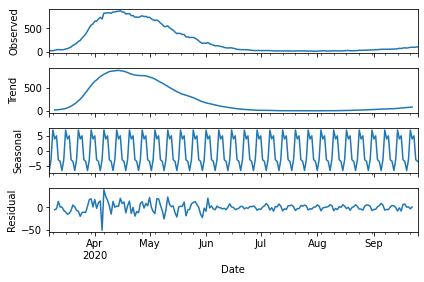

In [48]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Cases).plot()
result = sm.tsa.stattools.adfuller(train.Cases)
plt.show()

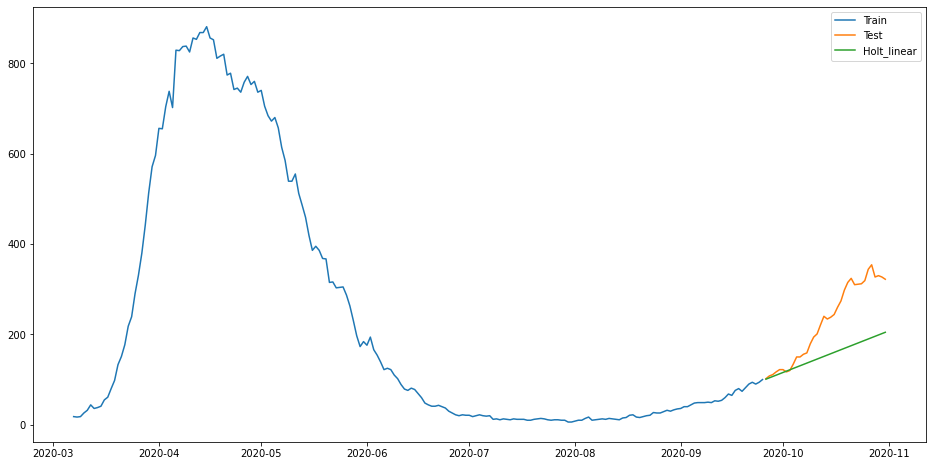

In [49]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Cases'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Cases'], label='Train')
plt.plot(test['Cases'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [50]:
rms_hlt = sqrt(mean_squared_error(test.Cases, y_hat_avg['Holt_linear']))
print("RMS Value: ", rms_hlt)

RMS Value:  92.02297581009427


## MODEL 6: Holt-Winters Method

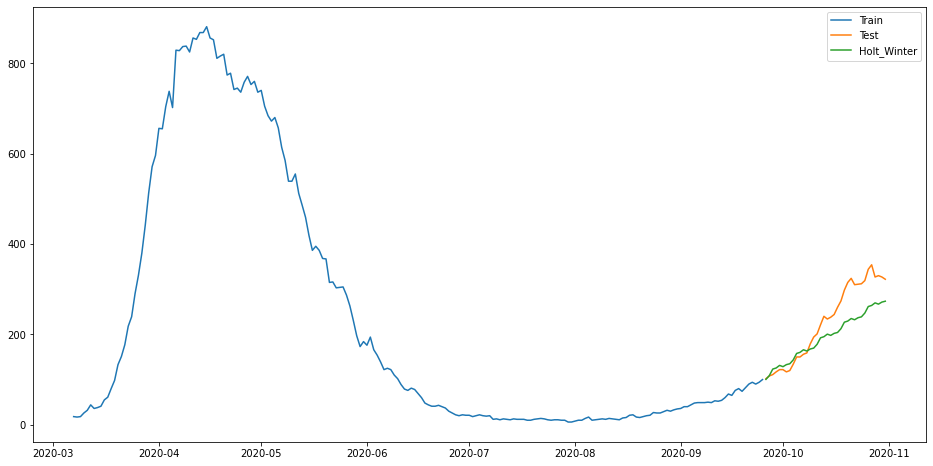

In [51]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Cases']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Cases'], label='Train')
plt.plot(test['Cases'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [52]:
rms_hw = sqrt(mean_squared_error(test.Cases, y_hat_avg['Holt_Winter']))
print("RMS Value: ", rms_hw)

RMS Value:  49.03741848283857


## MODEL 7: ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


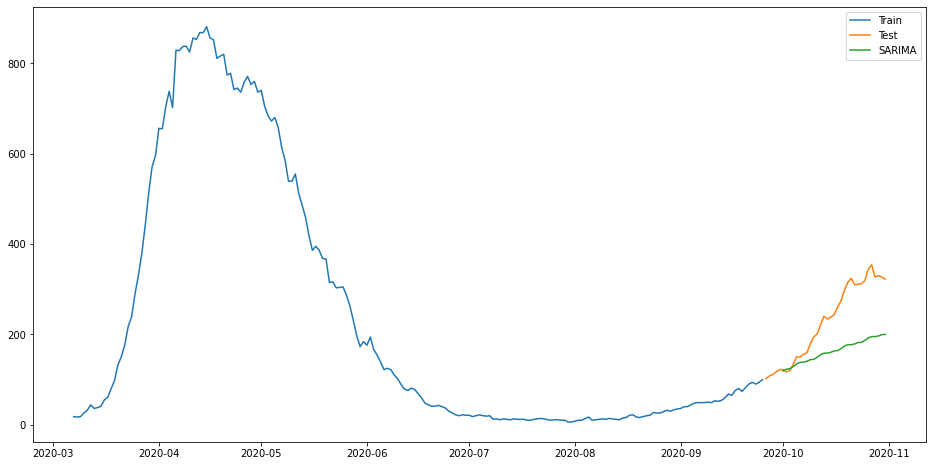

In [155]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Cases, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2020-10-1", end="2020-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Cases'], label='Train')
plt.plot(test['Cases'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [134]:
rms_a = sqrt(mean_squared_error(test[y_hat_avg.isnull().sum().sum():].Cases, y_hat_avg.dropna()["SARIMA"]))
print("RMS Value: ", rms_a)

RMS Value:  97.71463410056053


# EVALUATION

In [151]:
evaluation = pd.DataFrame({"Naive Approach": rms_na, 
              "Simple Average Method": rms_sa, 
              "Moving Average Method": rms_ma, 
              "Simple Exponential Smoothing": rms_ses, 
              "Holt’s Linear Trend": rms_hlt,
              "Holt-Winters Method": rms_hw,
              "ARIMA": [rms_a]}).T


evaluation.columns = ["RMS Values"]
evaluation

,RMS Values
Naive Approach,152.248335
Simple Average Method,85.161422
Moving Average Method,207.979349
Simple Exponential Smoothing,154.743079
Holt’s Linear Trend,92.022976
Holt-Winters Method,49.037418
ARIMA,97.714634
